<a href="https://colab.research.google.com/github/seungyihong/AI_ml/blob/master/basic_pandas_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas 와 matplotlib 이용하기

In [0]:
import pandas as pd
from pandas import DataFrame as df 
import numpy as np
import matplotlib.pyplot as plt

문제1) 주어진 자료를 바탕으로 pandas 표 만들기

In [0]:
data= {'미용실':[2241, 2118,   np.nan, 1706, 1518, 1543, 1508, 1325, 1257, 1279],
       '양식집':[1354,   np.nan, 1126,  827,  876,  834,   np.nan,  785,  801, 776],
       "일식집":[497, 440, 458, 446, 470, 489, 478, 443, 433, 439]}

#깔끔하게 데이터 정리하는게 좋다 
#리스트 x=[2,3,47,,,,,] data={'미용실':x}

In [0]:
data_df = pd.DataFrame(data)
data_df

,미용실,양식집,일식집
0,2241.0,1354.0,497
1,2118.0,NaN,440
2,NaN,1126.0,458
3,1706.0,827.0,446
4,1518.0,876.0,470
5,1543.0,834.0,489
6,1508.0,NaN,478
7,1325.0,785.0,443
8,1257.0,801.0,433
9,1279.0,776.0,439


In [0]:
a=[]
for i in range(2005,2015):
  a.append(i)
data_df=pd.DataFrame(data, index=a)
data_df

,미용실,양식집,일식집
2005,2241.0,1354.0,497
2006,2118.0,NaN,440
2007,NaN,1126.0,458
2008,1706.0,827.0,446
2009,1518.0,876.0,470
2010,1543.0,834.0,489
2011,1508.0,NaN,478
2012,1325.0,785.0,443
2013,1257.0,801.0,433
2014,1279.0,776.0,439


문제2)null값이 몇개 있는지 파악하기

In [0]:
data_df.isna().sum()

미용실    1
양식집    2
일식집    0
dtype: int64

문제3) null들을 다르게 채워보기 

In [0]:
data_df['미용실'] = data_df['미용실'].fillna(data_df['미용실'].mean())
data_df['양식집'] = data_df['양식집'].fillna(0)
data_df['일식집'] = data_df['일식집'].fillna(data_df.loc[2005,'일식집'])

In [0]:
data_df['미용실']=data_df['미용실'].astype('int')
data_df['양식집']=data_df['양식집'].astype('int')
data_df

,미용실,양식집,일식집
2005,2241,1354,497
2006,2118,0,440
2007,1610,1126,458
2008,1706,827,446
2009,1518,876,470
2010,1543,834,489
2011,1508,0,478
2012,1325,785,443
2013,1257,801,433
2014,1279,776,439


In [0]:
data_df.isna().sum()

미용실    0
양식집    0
일식집    0
dtype: int64

문제4) 일식집 열 추출 후 프레임 삭제 

In [0]:
il_df = data_df['일식집']
data_df.drop('일식집',axis=1,inplace=True)
data_df
# del 열만 없앨수있음


,미용실,양식집
2005,2241,1354
2006,2118,0
2007,1610,1126
2008,1706,827
2009,1518,876
2010,1543,834
2011,1508,0
2012,1325,785
2013,1257,801
2014,1279,776


문제5) 일식집을 중식집으로 이름 바꾸기

In [0]:
il_df=il_df.rename(columns={'일식집':'중식집'},axis='columns')
il_df

2005    497
2006    440
2007    458
2008    446
2009    470
2010    489
2011    478
2012    443
2013    433
2014    439
dtype: int64

문제6) 중식집 다시 붙여넣기 

In [0]:
data_df['중식집']=il_df 
data_df
# seiries 전체 넣을때 merge

,미용실,양식집,중식집
2005,2241,1354,497
2006,2118,0,440
2007,1610,1126,458
2008,1706,827,446
2009,1518,876,470
2010,1543,834,489
2011,1508,0,478
2012,1325,785,443
2013,1257,801,433
2014,1279,776,439


문제7) 폐업가게수가 2000개가 넘어가는 경우는 몇가지?

In [0]:
count=0
for idx in range(0,10):
  for col in range(0,3):
    value=data_df.iloc[idx,col]
    if value >2000:
      count = count+1
print(count)


2


In [0]:
data0=data_df>2000
sum(sum(data0.values))

2

문제8) 2000개가 넘어가는 경우의 연도는?

In [0]:
for a in data_df.index[data_df['미용실'] >= 2000]:
  print(a)


2005
2006


문제9) 데이터 그려보기

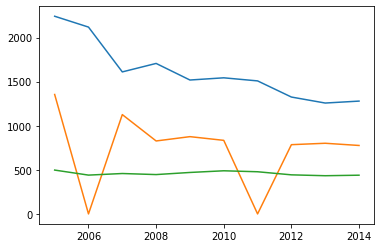

In [0]:
plt.plot(data_df)